In [6]:
#importing all the necessary files required for the processing of the AI models 
import time    #for the training and the testing time 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier   # for RF 
from sklearn.svm import SVC      # for SVC model 

from sklearn.linear_model import LogisticRegression # for LR



In [324]:
# Load Data Viz Pkgs

import matplotlib.pyplot as plt

import seaborn as sns
 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import neighbors, datasets, preprocessing
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
#preparing the data for the application of the algorithm


data = pd.read_csv('/Users/rishitmahapatra/Desktop/research purpose/modified_dataset.csv')
df = data

#read the csv file

In [278]:
#will rename the columns 

df.rename(columns={'Sensor ID': 'SensorID', 'Soil Moisture (%)' : 'SoilMoisturePercent' , 'Soil Type' : 'SoilType',  'Recommended Crop(s)':'RecommendedCrop_1','Recommended Crop(s).1': 'RecommendedCrop_2' }, inplace=True)  

#dropping the un nec essary columns of location , sensor ID, time stamp 




In [280]:
df = df.drop('SensorID' , axis= 1)
df = df.drop('Timestamp' , axis= 1)
df = df.drop('Location (Lat, Long)' , axis= 1)

#Merge to create one DF
# df=pd.concat([df1,df2], ignore_index=True)


In [282]:
df= df.rename(columns={'Unnamed: 6': 'RecommendedCrop_2'})
df
#renaming the recommended crops 2 to the original data frame

,SoilMoisturePercent,SoilType,RecommendedCrop_1,RecommendedCrop_2
0,9.7,Sandy,Millet,Sorghum
1,14.1,Clay,Wheat,Peas
2,23.4,Sandy,Corn,Sunflower
3,11.2,Sandy,Millet,Sorghum
4,30.1,Sandy,Potatoes,Carrots
...,...,...,...,...
4995,32.3,Loam,Rice,Sugarcane
4996,13.9,Clay,Wheat,Peas
4997,23.9,Loam,Maize,Cotton
4998,31.6,Sandy,Potatoes,Carrots


In [284]:
df

,SoilMoisturePercent,SoilType,RecommendedCrop_1,RecommendedCrop_2
0,9.7,Sandy,Millet,Sorghum
1,14.1,Clay,Wheat,Peas
2,23.4,Sandy,Corn,Sunflower
3,11.2,Sandy,Millet,Sorghum
4,30.1,Sandy,Potatoes,Carrots
...,...,...,...,...
4995,32.3,Loam,Rice,Sugarcane
4996,13.9,Clay,Wheat,Peas
4997,23.9,Loam,Maize,Cotton
4998,31.6,Sandy,Potatoes,Carrots


In [286]:
categorical_columns= ['SoilType']

#initializa one hot enconding 
encoder = OneHotEncoder(sparse_output=False)

#applying the one hot encoder to the categorical column
one_hot_encoded = encoder.fit_transform(df[categorical_columns])



In [288]:
#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)) #DataFrame function to create teh data frame 

#one_hot_encoded -> the variable which stores the encoded categorical data
# we will extract the fetaure from the SoilType which is  stores in the categorical_columns variable 

#concatenating the one hot encoded dataframe with the original data frame
df_encoded = pd.concat([df, one_hot_df], axis=1)



In [290]:
# the axis key word is crucial in determining the way the concatenetion is supposed to be done
# for axis = 1 -> the concatenation would be performed column wise 
# for axis = 0 -> the concatenation would be performed 

df_encoded

,SoilMoisturePercent,SoilType,RecommendedCrop_1,RecommendedCrop_2,SoilType_Clay,SoilType_Loam,SoilType_Sandy
0,9.7,Sandy,Millet,Sorghum,0.0,0.0,1.0
1,14.1,Clay,Wheat,Peas,1.0,0.0,0.0
2,23.4,Sandy,Corn,Sunflower,0.0,0.0,1.0
3,11.2,Sandy,Millet,Sorghum,0.0,0.0,1.0
4,30.1,Sandy,Potatoes,Carrots,0.0,0.0,1.0
...,...,...,...,...,...,...,...
4995,32.3,Loam,Rice,Sugarcane,0.0,1.0,0.0
4996,13.9,Clay,Wheat,Peas,1.0,0.0,0.0
4997,23.9,Loam,Maize,Cotton,0.0,1.0,0.0
4998,31.6,Sandy,Potatoes,Carrots,0.0,0.0,1.0


In [292]:
#drop the original soil type to avoid redundancy 


df_encoded = df_encoded.drop('SoilType' , axis=1)
#df_encoded  = df_encoded.rename(columns={'Unnamed: 6': 'RecommendedCrop_2'}) #renaming the unnamed crop 2 recommendation 
df_encoded

,SoilMoisturePercent,RecommendedCrop_1,RecommendedCrop_2,SoilType_Clay,SoilType_Loam,SoilType_Sandy
0,9.7,Millet,Sorghum,0.0,0.0,1.0
1,14.1,Wheat,Peas,1.0,0.0,0.0
2,23.4,Corn,Sunflower,0.0,0.0,1.0
3,11.2,Millet,Sorghum,0.0,0.0,1.0
4,30.1,Potatoes,Carrots,0.0,0.0,1.0
...,...,...,...,...,...,...
4995,32.3,Rice,Sugarcane,0.0,1.0,0.0
4996,13.9,Wheat,Peas,1.0,0.0,0.0
4997,23.9,Maize,Cotton,0.0,1.0,0.0
4998,31.6,Potatoes,Carrots,0.0,0.0,1.0


In [302]:
# Drop the original categorical columns


df_encoded = df_encoded.drop("RecommendedCrop_1", axis=1)

df_encoded = df_encoded.drop("RecommendedCrop_2", axis=1)

X =df_encoded 



In [304]:
X  #to store only the soil type categorical columns seperately in X dataframe 

,SoilMoisturePercent,SoilType_Clay,SoilType_Loam,SoilType_Sandy
0,9.7,0.0,0.0,1.0
1,14.1,1.0,0.0,0.0
2,23.4,0.0,0.0,1.0
3,11.2,0.0,0.0,1.0
4,30.1,0.0,0.0,1.0
...,...,...,...,...
4995,32.3,0.0,1.0,0.0
4996,13.9,1.0,0.0,0.0
4997,23.9,0.0,1.0,0.0
4998,31.6,0.0,0.0,1.0


In [306]:
categorical_columns=['RecommendedCrop_1','RecommendedCrop_2'] #stores the crop1  as categorical 
#initialising one hot encoding 

encoder = OneHotEncoder( sparse_output = False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])


#formation of a data frame usng the categorical columns 
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
one_hot_df 

,RecommendedCrop_1_Corn,RecommendedCrop_1_Maize,RecommendedCrop_1_Millet,RecommendedCrop_1_Potatoes,RecommendedCrop_1_Rice,RecommendedCrop_1_Wheat,RecommendedCrop_2_ Barley,RecommendedCrop_2_ Carrots,RecommendedCrop_2_ Cotton,RecommendedCrop_2_ Peas,RecommendedCrop_2_ Sorghum,RecommendedCrop_2_ Soybeans,RecommendedCrop_2_ Sugarcane,RecommendedCrop_2_ Sunflower
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded 


,SoilMoisturePercent,SoilType,RecommendedCrop_1,RecommendedCrop_2,RecommendedCrop_1_Corn,RecommendedCrop_1_Maize,RecommendedCrop_1_Millet,RecommendedCrop_1_Potatoes,RecommendedCrop_1_Rice,RecommendedCrop_1_Wheat,RecommendedCrop_2_ Barley,RecommendedCrop_2_ Carrots,RecommendedCrop_2_ Cotton,RecommendedCrop_2_ Peas,RecommendedCrop_2_ Sorghum,RecommendedCrop_2_ Soybeans,RecommendedCrop_2_ Sugarcane,RecommendedCrop_2_ Sunflower
0,9.7,Sandy,Millet,Sorghum,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,14.1,Clay,Wheat,Peas,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,23.4,Sandy,Corn,Sunflower,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,11.2,Sandy,Millet,Sorghum,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,30.1,Sandy,Potatoes,Carrots,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32.3,Loam,Rice,Sugarcane,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,13.9,Clay,Wheat,Peas,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4997,23.9,Loam,Maize,Cotton,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4998,31.6,Sandy,Potatoes,Carrots,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [310]:
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded = df_encoded.drop("SoilType", axis=1)
df_encoded = df_encoded.drop("SoilMoisturePercent", axis=1)
df_encoded


,RecommendedCrop_1_Corn,RecommendedCrop_1_Maize,RecommendedCrop_1_Millet,RecommendedCrop_1_Potatoes,RecommendedCrop_1_Rice,RecommendedCrop_1_Wheat,RecommendedCrop_2_ Barley,RecommendedCrop_2_ Carrots,RecommendedCrop_2_ Cotton,RecommendedCrop_2_ Peas,RecommendedCrop_2_ Sorghum,RecommendedCrop_2_ Soybeans,RecommendedCrop_2_ Sugarcane,RecommendedCrop_2_ Sunflower
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [312]:
y = df_encoded 
y #to store the crop types only  (both the recommended 1 and 2 ) 

,RecommendedCrop_1_Corn,RecommendedCrop_1_Maize,RecommendedCrop_1_Millet,RecommendedCrop_1_Potatoes,RecommendedCrop_1_Rice,RecommendedCrop_1_Wheat,RecommendedCrop_2_ Barley,RecommendedCrop_2_ Carrots,RecommendedCrop_2_ Cotton,RecommendedCrop_2_ Peas,RecommendedCrop_2_ Sorghum,RecommendedCrop_2_ Soybeans,RecommendedCrop_2_ Sugarcane,RecommendedCrop_2_ Sunflower
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
y.columns = y.columns.str.replace("RecommendedCrop_1_", "")
y.columns = y.columns.str.replace("RecommendedCrop_2_", "")

y  #replacing the names with space 

,Corn,Maize,Millet,Potatoes,Rice,Wheat,Barley,Carrots,Cotton,Peas,Sorghum,Soybeans,Sugarcane,Sunflower
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [316]:
#str.replace("RecommendedCrop_1_", "")
#str: The .str accessor is used to apply string functions element-wise to each column name in the y.columns Index object.
#replace("RecommendedCrop_1_", ""): The replace method is used to replace occurrences of a specified substring with another substring. In this case:
#"RecommendedCrop_1_": This is the substring you want to remove from each column name.
#"" (empty string): This is the string that will replace "RecommendedCrop_1_". Since it’s an empty string, the substring will effectively be removed from the column names.

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

#this function is used to create subset of data set which would divide the data in training and testing
# the test_size specifices the % of the data to be used for testing and traing (here it follows the 30% rule  )
#the 2 subset of the data would be ( X_train, y_train) and (X_test, y_test)


In [354]:
y_test.shape


(1500, 14)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       350
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00       327
           5       0.98      1.00      0.99       321
           6       1.00      1.00      1.00       175
           7       1.00      1.00      1.00       156
           8       1.00      1.00      1.00       182
           9       0.97      1.00      0.98       146
          10       1.00      1.00      1.00       164
          11       1.00      0.97      0.99       181
          12       1.00      1.00      1.00       327
          13       1.00      1.00      1.00       169

   micro avg       1.00      1.00      1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000
 sa

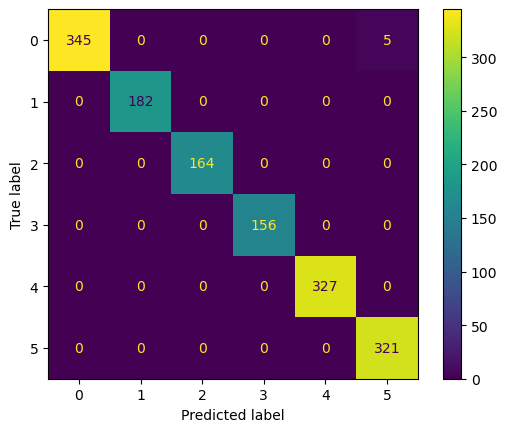

In [348]:
# we will be using the KNN classifier here

knn = KNeighborsClassifier(metric="euclidean")   #initiates the KNN model to predict the output from the sklearn lib


start_train_time = time.time()

clf=knn.fit(X_train, y_train)
#this is used to fit the model in the given sets of data where X_train contains the feature matrix to be trained with (input data) 
#X_train would take the SoilType as input to predict the crops to be grown as output 
#y_train is used to predict the values ( to predict which crop would be recommended to grow )

end_train_time = time.time()
training_time = end_train_time - start_train_time #calculates the total training time


start_test_time = time.time()
y_pred = clf.predict(X_test)
#after the model is trained and stored in clf ; the predict fucntion is used to store the prdicted values for the data stored in X_test 
# basically would predict the value for test case X 
end_test_time = time.time()
testing_time = end_test_time - start_test_time #calculates the total testing time 


#result1 = classification_report(y_test, y_pred, zero_division=0)
#this stores the report -> which includes the actual values stored in y_test for the X_test and the predicted values y_pred which are 
#predicted for X_test
result1 = classification_report(y_test, y_pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#print('Classification Report FOR KNN:',)
#print (result1)
#prints the report 


#result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2*100) #in terms of percentage 

print("Total Training Time:" , training_time)
print("Total Testing Time:" , testing_time)




Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00       327
           5       1.00      1.00      1.00       321
           6       1.00      1.00      1.00       175
           7       1.00      1.00      1.00       156
           8       1.00      1.00      1.00       182
           9       1.00      1.00      1.00       146
          10       1.00      1.00      1.00       164
          11       1.00      1.00      1.00       181
          12       1.00      1.00      1.00       327
          13       1.00      1.00      1.00       169

   micro avg       1.00      1.00      1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000
 sa

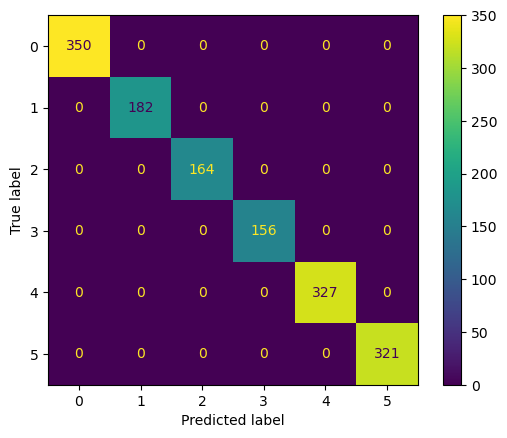

In [350]:
# we will be using the Decision Tree classifier here:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

start_train_time = time.time()
clf.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

start_test = time.time()
y_pred = clf.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test


result1 = classification_report(y_test, y_pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#accuracy = accuracy_score(y_test, y_pred)
#print('Classification Report:',)
#print (result1)

#result2 = accuracy_score(y_test,y_pred)

#print('Accuracy:',result2)
print("Total Training Time:" , training_time)
print("Total Testing Time:" , testing_time)





Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       350
           1       0.99      1.00      0.99       182
           2       1.00      1.00      1.00       164
           3       1.00      0.95      0.97       156
           4       1.00      0.99      1.00       327
           5       1.00      1.00      1.00       321
           6       1.00      1.00      1.00       175
           7       1.00      0.95      0.97       156
           8       0.99      1.00      0.99       182
           9       1.00      1.00      1.00       146
          10       1.00      1.00      1.00       164
          11       0.98      0.97      0.98       181
          12       1.00      0.99      1.00       327
          13       0.98      1.00      0.99       169

   micro avg       0.99      0.99      0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       1.00      0.99      0.99      3000
 sa

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


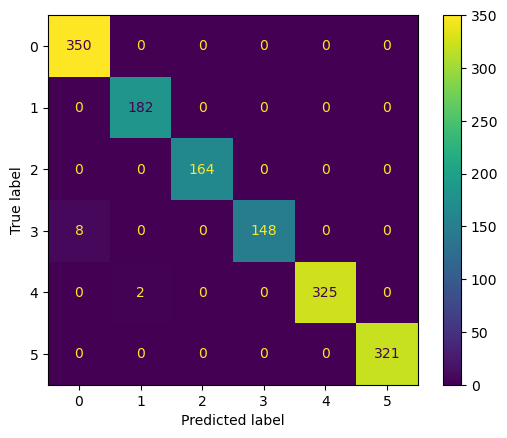

In [380]:

import sklearn.neural_network 
# Create an instance of the MLPClassifier class
neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1500)
 # Fit the model to the training data 
neural_network.fit(X_train, y_train) 
# Predict the labels of new data 
y_pred = neural_network.predict(X_test)

result1 = classification_report(y_test, y_pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00       327
           5       1.00      1.00      1.00       321
           6       1.00      1.00      1.00       175
           7       1.00      1.00      1.00       156
           8       1.00      1.00      1.00       182
           9       1.00      1.00      1.00       146
          10       1.00      1.00      1.00       164
          11       1.00      1.00      1.00       181
          12       1.00      1.00      1.00       327
          13       1.00      1.00      1.00       169

   micro avg       1.00      1.00      1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000
 sa

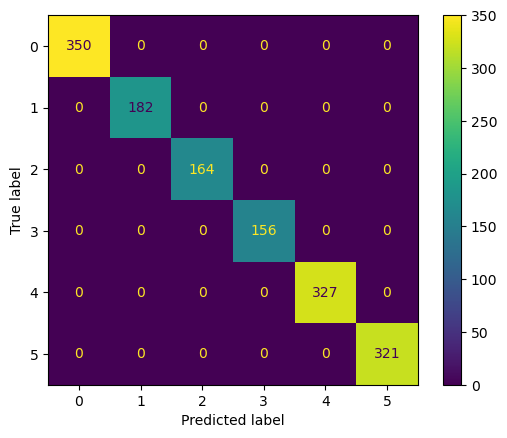

In [358]:
#for random forrest test 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

result1 = classification_report(y_test, y_pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
